# ![](https://ga-dash.s3.amazonaws.com/production/assets/logo-9f88ae6c9c3871690e33280fcf557f33.png) Project 4B - Social Impact

---

### <b> Notebook 3: Data balancing for MBTI dataset

Structure of this notebook </b>

* Part 1: Exploring the MBTI class distribution
* Part 2: Data Oversampling & Undersampling for Imbalanced MBTI Classes
* Part 3: Saving the Balanced MBTI dataset into a new a CSV file


---

### Import Libraries

In [1]:
# Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing imports
from sklearn.utils import resample

# Setting random seed for entire notebook
import random
random.seed(42)

### Part 1: Exploring the MBTI class distribution

(a) To import in the cleaned dataset

In [2]:
# Read the dataset
df_clean_mbti = pd.read_csv("./cleaned_data/mbti_cleaned.csv")

In [3]:
# Inspect the dataset
df_clean_mbti.head()

,type,posts,processed_posts
0,INFJ,'http://www.youtube.com/watch?v=qsxhcwe3krw|||...,enfp and intj moments sportscenter not top te...
1,ENTP,'i'm finding the lack of me in these posts ver...,i'm finding the lack of me in these posts very...
2,INTP,'good one _____ https://www.youtube.com/wat...,good one of course to which i say i know that'...
3,INTJ,"'dear intp, i enjoyed our conversation the o...",dear intp i enjoyed our conversation the other...
4,ENTJ,'you're fired.|||that's another silly misconce...,you're fired that's another silly misconceptio...


In [4]:
# Drop the unprocessed column from the dataset
df_clean_mbti = df_clean_mbti[["type", "processed_posts"]]

In [5]:
# Recheck the dataset to ensure changes in place
df_clean_mbti.head()

,type,processed_posts
0,INFJ,enfp and intj moments sportscenter not top te...
1,ENTP,i'm finding the lack of me in these posts very...
2,INTP,good one of course to which i say i know that'...
3,INTJ,dear intp i enjoyed our conversation the other...
4,ENTJ,you're fired that's another silly misconceptio...


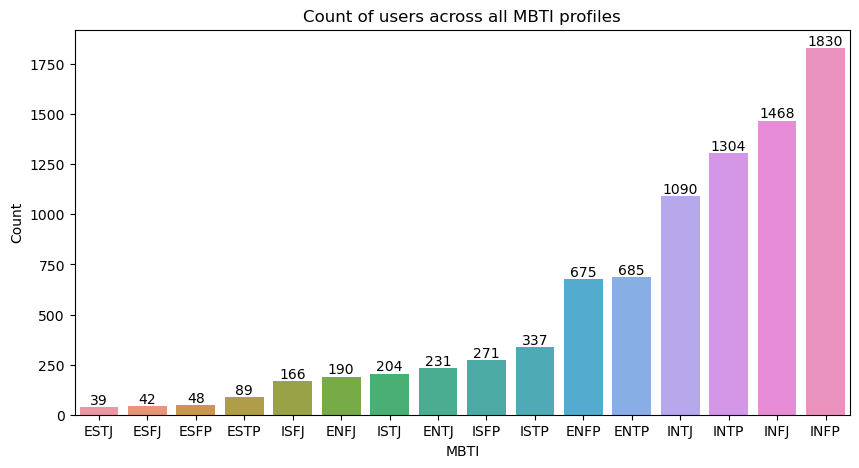

In [6]:
# plot to see proportion of mbti classes 
plt.figure(figsize = (10,5))

# set order of plot - arranged the categories in ascending order of sample sizes
order_group = df_clean_mbti.groupby("type")["type"].value_counts().sort_values().reset_index()["type"].tolist()

graph = sns.countplot(df_clean_mbti, x = "type", order = order_group)

for label in graph.containers:
    graph.bar_label(label)

plt.title("Count of users across all MBTI profiles")
plt.xlabel("MBTI")
plt.ylabel("Count")
plt.show();

**Summary:**

After looking at the distribution, we realise that the sample sizes of the "extroversion" types are lower in general. As such, there is a possibility that during modelling, the models will predict introversion better due to the variety of texts available. 

We have also found articles that introverts tend to use text-based chat groups/ online methods to express their thoughts compared to extroverts.

1. [Personality and Internet Use: A Case of Introversion and Extroversion](https://www.tutorialspoint.com/personality-and-internet-use-a-case-of-introversion-and-extroversion)
2. [Personality and Online/Offline Choices: MBTI Profiles and Favored Communication Modes in a Singapore Study](https://www.researchgate.net/publication/7280555_Personality_and_OnlineOffline_Choices_MBTI_Profiles_and_Favored_Communication_Modes_in_a_Singapore_Study)

As such, we will remove all the "extroversion" classes, to focus on introverts in this project. 

In [7]:
extrovert_labels = ["ESTJ", "ESFJ", "ESFP", "ESTP", "ENFJ", "ENTJ", "ENFP", "ENTP"]

# remove the rows with extroversion labels
df_clean_mbti = df_clean_mbti[~df_clean_mbti["type"].isin(extrovert_labels)]

# check remaining unique types - which should be introversion types only
df_clean_mbti["type"].unique()

array(['INFJ', 'INTP', 'INTJ', 'INFP', 'ISFP', 'ISTP', 'ISFJ', 'ISTJ'],
      dtype=object)

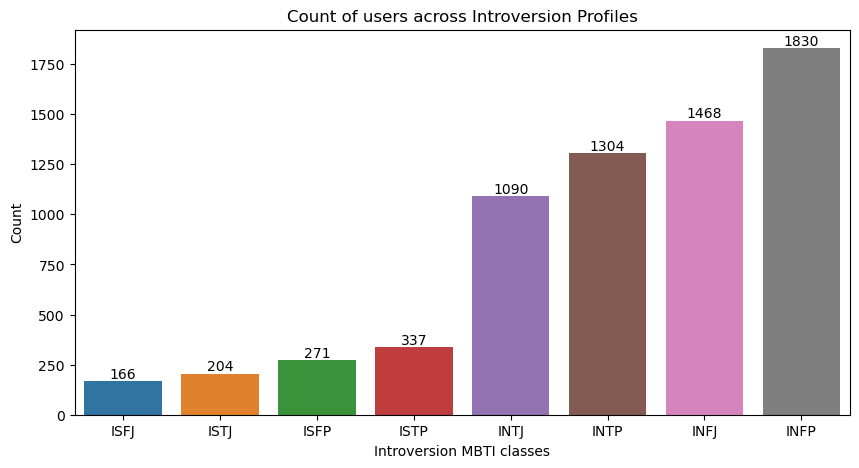

In [8]:
# plot to see proportion of introvert classes 
plt.figure(figsize = (10,5))

# set order of plot - arranged the categories by median price
order_group = df_clean_mbti.groupby("type")["type"].value_counts().sort_values().reset_index()["type"].tolist()

graph = sns.countplot(df_clean_mbti, x = "type", order = order_group)

for label in graph.containers:
    graph.bar_label(label)

plt.title("Count of users across Introversion Profiles")
plt.xlabel("Introversion MBTI classes")
plt.ylabel("Count")
plt.show();

**Insights:**

Based on the 8 introversion classes, we have half of the classes with more than 1000 samples while the remaining has less than 350 samples. 

As such, we will employ both undersampling and oversampling methods to bootstrap the classes with less samples (ISFJ, ISTJ, ISFP, ISTP) and undersample the remaining classes. As a group we will balance out the data to n = 300.

---

### Part 2: Data Oversampling & Undersampling for Imbalanced MBTI Classes

In [9]:
high_sample_classes = ["INTJ", "INTP", "INFJ", "INFP", "ISTP"]
low_sample_classes = ["ISFJ", "ISTJ", "ISFP"]

# Count the number of samples for each class
type_counts = df_clean_mbti["type"].value_counts()

# Set the sample size we want for each class
class_size = 300

# Balance the dataset by downsampling or upsampling accordingly
# Instantiate an empty dataframe respectively 
downsampled_df = pd.DataFrame()
upsampled_df = pd.DataFrame()

for personality_type in type_counts.index:
    if personality_type in high_sample_classes:
        personality_subset_down = df_clean_mbti[df_clean_mbti["type"] == personality_type]
        downsampled_subset = resample(personality_subset_down,
                                  replace = False,  # Downsample without replacement
                                  n_samples = class_size,
                                  random_state = 42) 
        downsampled_df = pd.concat([downsampled_df, downsampled_subset])


    if personality_type in low_sample_classes:
        personality_subset_up = df_clean_mbti[df_clean_mbti["type"] == personality_type]
        upsampled_subset = resample(personality_subset_up,
                                    replace = True, # Upsample with replacement
                                    n_samples = class_size,
                                    random_state = 42)  
        upsampled_df = pd.concat([upsampled_df, upsampled_subset])


# Shuffle both dataframes
downsampled_df = downsampled_df.sample(frac = 1, random_state = 42).reset_index(drop = True)
upsampled_df = upsampled_df.sample(frac=1, random_state = 42).reset_index(drop=True)

# Combine both dataframes into 1
df_final_balanced_mbti = pd.concat([downsampled_df, upsampled_df], ignore_index=True)

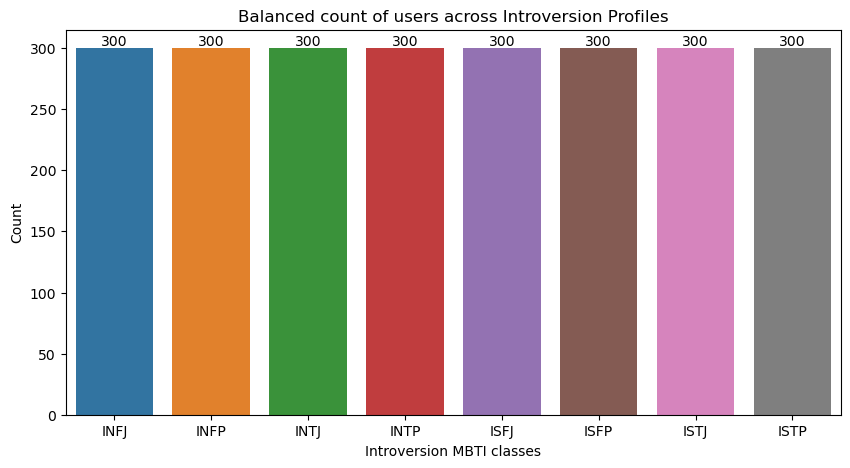

In [10]:
# replot the resampled datasetb
plt.figure(figsize = (10,5))

# set order of plot - arranged the categories by median price
order_group = df_final_balanced_mbti.groupby("type")["type"].value_counts().sort_values().reset_index()["type"].tolist()

graph = sns.countplot(df_final_balanced_mbti, x = "type", order = order_group)

for label in graph.containers:
    graph.bar_label(label)

plt.title("Balanced count of users across Introversion Profiles")
plt.xlabel("Introversion MBTI classes")
plt.ylabel("Count")
plt.show();

---

### Part 3: Saving the Balanced MBTI dataset into a new a CSV file

In [11]:
# Save the balanced dataframes to new CSV files for model development
df_final_balanced_mbti.to_csv("./cleaned_data/final_balanced_cleaned_mbti.csv", index = False)

**Summary:**

We have successfully balanced out the samples for every class. The newly saved csv file will be used in Part 3 for text preprocessing and modelling.